# project using yelp Dataset

- User Engagement Analysis for Restaurant Success

- User engagement analysis is a crucial aspect of restaurant success. It involves analyzing customer interactions with your restaurant,

# import libraries

In [34]:
import pandas as pd
import json
from  sqlalchemy import create_engine

# load data jaon to dataframe usnig pandas and load jason

-  I am using chunks of data from the dataset, specifically the first 100,000 rows, because my system cannot handle large files.

In [3]:
n_rows = 100000

with open('yelp_academic_dataset_checkin.json', 'r', encoding='utf-8') as f:
    checkin = [json.loads(next(f)) for _ in range(n_rows)]

checkin_df = pd.DataFrame(checkin)

with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    business_data = [json.loads(next(f)) for _ in range(n_rows)]

business_df = pd.DataFrame(business_data)

with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    review = [json.loads(next(f)) for _ in range(n_rows)]

review_df = pd.DataFrame(review)

with open('yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as f:
    tip = [json.loads(next(f)) for _ in range(n_rows)]

tip_df = pd.DataFrame(tip)


with open('yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    user = [json.loads(next(f)) for _ in range(n_rows)]

user_df = pd.DataFrame(user)

In [4]:
# Drop non-functional columns from the dataframe.
business_df.drop(['attributes','hours'],axis=1,inplace = True)

- All data frames are stored in a database named yelp.db.

In [5]:
# create SQL engine for coection 
engine = create_engine('sqlite:///yelp.db')

# define a function load_dataframe load dataframe into sql using to_sql
def load_dataframe(df, table_name, engine):
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)


# Load each dataframe into a separate table
load_dataframe(business_df, 'business', engine)
load_dataframe(review_df, 'review', engine)
load_dataframe(user_df, 'user', engine)
load_dataframe(tip_df, 'tip', engine)
load_dataframe(checkin_df, 'checkin', engine)

# Import all the main libraries I am using in this analysis.

In [6]:
import pandas as pd                 # For data manipulation and analysis
import matplotlib.pyplot as plt     # For creating static, animated, and interactive visualizations
import seaborn as sns               # For statistical data visualization based on matplotlib
from datetime import datetime       # For manipulating dates and times
import numpy as np                  # For numerical computations and working with arrays
import folium                       # For creating interactive maps
from geopy.geocoders import Nominatim  # For geocoding and working with geographical locations
from matplotlib.colors import LinearSegmentedColormap  # For creating custom colormaps for visualizations
from IPython.display import display  # For displaying data in Jupyter notebooks
import warnings                      # For controlling the display of warnings
warnings.filterwarnings('ignore')    # Ignore warnings to keep the output clean
import sqlite3                       # For working with SQLite databases


# Establish a connection to the database.

In [7]:
conn = sqlite3.connect('yelp.db')

In [8]:
# Get tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)



In [9]:
tables

,name
0,resto
1,business
2,review
3,user
4,tip
5,checkin


# Explore all tables

In [10]:
# explore what type of data acailble in the tables
for table in tables['name']:
     querry = f"select * from {table} limit 2"
     display(f"{table}",pd.read_sql_query(querry,conn))

'resto'

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6


'business'

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."


'review'

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


'user'

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946


'tip'

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


'checkin'

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."


# # Data checking and Cleaning

In [11]:
# total num of business
pd.read_sql_query("select count(*) as total_buseness from business",conn)

,total_buseness
0,100000


In [12]:
# Store the data in a DataFrame because I am analyzing data related to restaurant engagement.
res_df=pd.read_sql_query("""select business_id,review_count from business 
                  where lower(categories)  like '%restaurant%' """,conn)

In [13]:
# shape of data (how many data in table have restaurant)
res_df.shape

(34760, 2)

- Store the data in an SQL database because I need to use multiple tables with joins and WHERE conditions for analysis. I will use this table multiple times for joins and WHERE clauses in the analysis.

- This table only for restaurant business_id

In [14]:
# load dataframe into sql table
load_dataframe(res_df,'resto',engine)

In [15]:
# check this table store or not
pd.read_sql_query("""select * from resto""",conn)


,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,k0hlBqXX-Bt0vf1op7Jr1w,19
3,bBDDEgkFA1Otx9Lfe7BZUQ,10
4,eEOYSgkmpB90uNA7lDOMRA,10
...,...,...
34755,j1CCLERiAMYSvCPhDmJN1g,17
34756,lkAzVdzEZE0jEU91PmvQhQ,33
34757,xOrYm_QU2As1LTYhgsglmw,92
34758,Z2_-rlxyXQsqcGXChydhlA,116


# check outliers in my data and remove these 

In [16]:
# avg , min, max , median
pd.read_sql_query("""
                    select  avg(review_count) as avg_review_count,
                  min(review_count) as min_review_count,
                  max(review_count) as max_review_count,
                  (select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review_count,
                  
                  avg(stars) as avg_rating,
                  min(stars) as min_rating,
                  max(stars) as max_rating,
                  (select stars from business order by stars limit 1 offset (Select count(*) from business)/2) as median_rating
                  from business 
                  where business_id in (select business_id from resto)""",conn).transpose()

,0
avg_review_count,87.001640
min_review_count,5.000000
max_review_count,6093.000000
median_review_count,15.000000
avg_rating,3.515132
min_rating,1.000000
max_rating,5.000000
median_rating,3.500000


In [17]:
def remove_outliers_iqr(df, col):
      
    if not pd.api.types.is_numeric_dtype(df[col]):
        raise TypeError(f"The column '{col}' is not numeric.")

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # Calculate IQR (Interquartile Range)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter out the outliers
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_filtered


In [18]:
# shape of dataframe
res_df.shape

(34760, 2)

In [19]:
# remove outliers
res_df=remove_outliers_iqr(res_df,'review_count')

In [35]:
# after romeove outliers shape of dataframe
res_df.shape

(31113, 2)

In [21]:
# update table resto in sqldatabse
load_dataframe(res_df,'resto',engine)

In [22]:
# Is update?
pd.read_sql_query("select count(*) as total_rows from resto",conn)

,total_rows
0,31113


# All data is cleaned, and starting the analysis on clean data.

#  Q. which restaurants have the highest number of reviews?

In [24]:
pd.read_sql_query(f"""
                    select name, sum(review_count) as review_count ,
                  round(avg(stars),2) as avg_rating
                  from business
                  where business_id IN (select business_id from resto)
                  group by name 
                  order by review_count desc
                  limit 10
                  """,conn)

,name,review_count,avg_rating
0,McDonald's,11208,1.84
1,Chipotle Mexican Grill,6888,2.45
2,Taco Bell,5730,2.15
3,Chick-fil-A,4880,3.38
4,Panera Bread,4700,2.71
5,Buffalo Wild Wings,4684,2.38
6,Wendy's,4415,1.98
7,Chili's,4389,2.53
8,IHOP,4291,2.43
9,Domino's Pizza,4013,2.28


#  Q. which restaurants have the highest rating rating ?

In [25]:
pd.read_sql_query(f"""
                    select name, sum(review_count) as review_count ,
                  round(avg(stars),2) as avg_rating
                  from business
                  where business_id IN (select business_id from resto)
                  group by name 
                  order by avg_rating desc
                  limit 10
                  """,conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,the brewers cabinet production,13,5.0
2,la 5th av tacos,24,5.0
3,john klahr's Signature BBQ,9,5.0
4,eat.drink.Om...YOGA CAFE,7,5.0
5,cabbage vegetarian cafe,12,5.0
6,agua bistro,25,5.0
7,Zuppetta Italian Kitchen & Catering,22,5.0
8,Zlatno Zito,36,5.0
9,Zlatne Kapi,11,5.0


# Do restaurants with higher engagement tend to have hogher ratings?

- checkin count of business_id

In [26]:
checkin_count = """
select business_id , sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin 
                  group by business_id"""
pd.read_sql_query(checkin_count,conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
99995,kbbh3rkueBubhJa_QQjwpA,19
99996,kbdepoAfgcsVmngXg2B-5w,26
99997,kbeSI3swiGHymmlK2Cznfw,235
99998,kbexVWZtu3j87c0SgsaHfw,19


- tip count of business_id

In [ ]:
tip_count=pd.read_sql_query("""select business_id, count(*) as tip_count from tip
                  group by business_id""",conn)
tip_count

,business_id,tip_count
0,--0iUa4sNDFiZFrAdIWhZQ,3
1,--7PUidqRWpRSpXebiyxTg,1
2,--8IbOsAAxjKRoYsBFL-PA,1
3,--MbOh2O1pATkXa7xbU6LA,2
4,--O3ip9NpXTKD4oBS1pY2A,3
...,...,...
37785,zzIF9qp2UoHN48EeZH_IDg,1
37786,zzXDi0Pdv0s84M-oQaIa_g,6
37787,zzbZtgPYZS8sTIWQH6DwEw,1
37788,zznJox6-nmXlGYNWgTDwQQ,1


1.	Higher User Engagement Leads to Better Ratings

In [ ]:
rew_vs_count = pd.read_sql_query(""" select avg(review_count) as avg_review_count,
                                 rating from
                                 (select business_id, avg(stars) as rating, 
                  sum(review_count) as review_count from business
                  where business_id in (Select business_id from resto)
                  group by business_id) a
                    group by rating""",conn)



- Create a bar plot to check the engagement between rating and review count

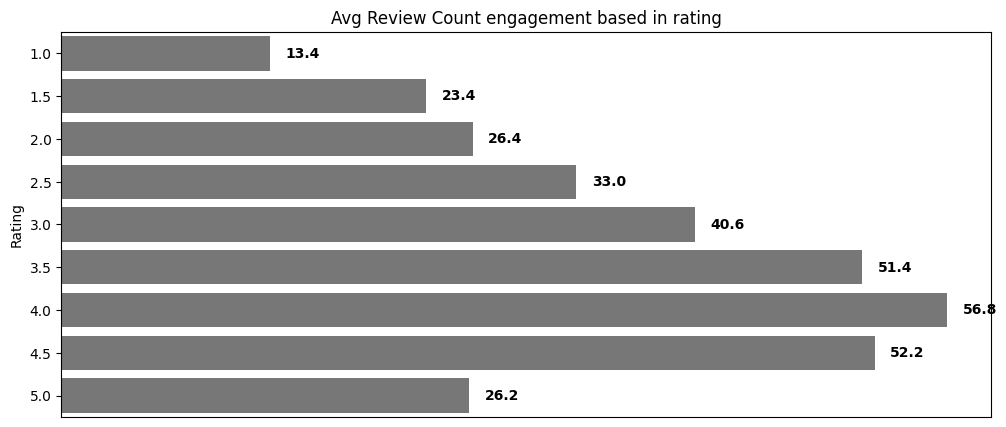

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Avg Review Count engagement based in rating')
plt.xticks([])
sns.barplot(data = rew_vs_count, x='avg_review_count', y = rew_vs_count['rating'].astype('str'),color= '#777777')
for i, value in enumerate(rew_vs_count['avg_review_count']):
    plt.text(value+1, i, round(value,1), color = 'black', va= 'center', fontdict= {'weight' : 'bold'})
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()

- Create a bar plot to check the engagement between rating, review count, check-in count, and tip count

In [ ]:
rating_df = pd.read_sql_query("""select avg_rating as rating, 
                        avg(review_count) as avg_review_count,
                        avg(checkin_count) as avg_checkin_count,
                        avg(tip_count) as avg_tip_count
                  from(
            select b.business_id,sum(review_count) as review_count,
                  avg(stars) as avg_rating,
                  sum(ci.checkin_count) as checkin_count,
                  sum(tip_count) as tip_count
                  from business b
            left join (select business_id, count(*) as tip_count from tip group by business_id) as tip on
                        tip.business_id = b.business_id
            left join (select business_id , sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin 
                  group by business_id) as ci on 
                  ci.business_id = b.business_id
            group by b.business_id) a
                where a.business_id in (select business_id from resto)
                  group by avg_rating""",conn)

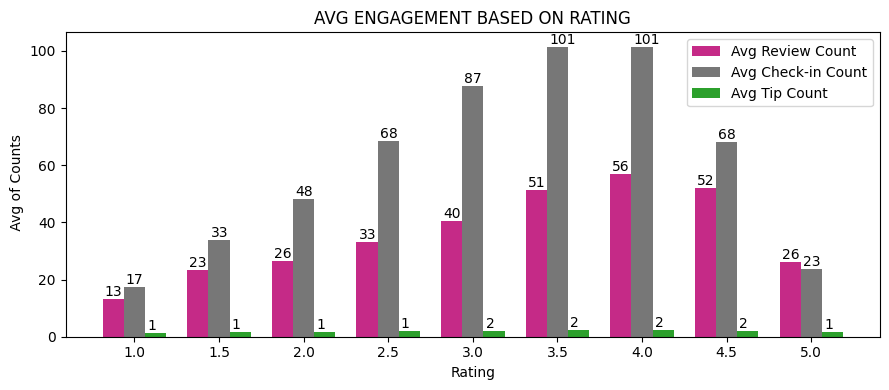

In [ ]:


# Plot
fig, ax = plt.subplots(figsize=(9, 4))

# Set positions and width for bars
positions = list(range(len(rating_df['rating'])))
width = 0.25  # Width of each bar

# Plot each category
bar1 = ax.bar([p - width for p in positions], rating_df['avg_review_count'], width=width, label='Avg Review Count', color='#c52a87')
bar2 = ax.bar(positions, rating_df['avg_checkin_count'], width=width, label='Avg Check-in Count', color='#777777')
bar3 = ax.bar([p + width for p in positions], rating_df['avg_tip_count'], width=width, label='Avg Tip Count', color='#2ca02c')

# Add labels and title
ax.set_xlabel('Rating')
ax.set_ylabel(' Avg of Counts')
ax.set_title('AVG ENGAGEMENT BASED ON RATING')
ax.set_xticks(positions)
ax.set_xticklabels(rating_df['rating'])
ax.legend()

# Add labels on top of bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/10, yval, int(yval), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()



2.	Frequent Reviews Correlate with Increased Popularity: 

- is there a correlation between the number of reviwes , tips , and checkind for a business?

In [ ]:
# Calculate the correlation coefficient
pd.read_sql_query("""
            select b.business_id,sum(review_count) as review_count,
                  avg(stars) as avg_rating,
                  sum(ci.checkin_count) as checkin_count,
                  sum(tip_count) as tip_count
                  from business b
            left join (select business_id, count(*) as tip_count from tip group by business_id) as tip on
                        tip.business_id = b.business_id
            left join (select business_id , sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin 
                  group by business_id) as ci on 
                  ci.business_id = b.business_id
            group by b.business_id""",conn).dropna()


,business_id,review_count,avg_rating,checkin_count,tip_count
2,--7PUidqRWpRSpXebiyxTg,12,2.0,10.0,1.0
3,--8IbOsAAxjKRoYsBFL-PA,27,3.0,32.0,1.0
6,--MbOh2O1pATkXa7xbU6LA,25,4.0,103.0,2.0
11,--ZVrH2X2QXBFdCilbirsw,32,4.5,67.0,1.0
19,--sXnWH9Xm6_NvIjyuA99w,29,4.0,970.0,4.0
...,...,...,...,...,...
75808,kb1Tf4xwb7CQW5OXf9zwqw,601,4.0,786.0,5.0
75817,kbFwcVMsHlNNXGWRZpEYhg,125,3.0,177.0,1.0
75820,kbJ93sFTSPUdur6VVvj2uQ,50,4.0,42.0,1.0
75826,kbUeqMV5NzSHVVzJURSuBA,287,4.0,232.0,2.0


In [ ]:
# store into datafratme
df=pd.read_sql_query("""
            select b.business_id,sum(review_count) as review_count,
                  avg(stars) as avg_rating,
                  sum(ci.checkin_count) as checkin_count,
                  sum(tip_count) as tip_count
                  from business b
            left join (select business_id, count(*) as tip_count from tip group by business_id) as tip on
                        tip.business_id = b.business_id
            left join (select business_id , sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin 
                  group by business_id) as ci on 
                  ci.business_id = b.business_id
            group by b.business_id""",conn).dropna()

In [ ]:
# correlation between
df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.579295,0.601405
checkin_count,0.579295,1.000000,0.648509
tip_count,0.601405,0.648509,1.000000


# Heat map chart for show correlation 

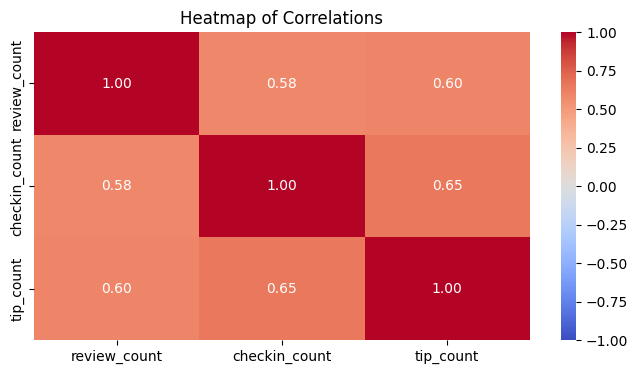

In [ ]:
corr_matrix = df[['review_count', 'checkin_count', 'tip_count']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Heatmap of Correlations')
plt.show()

- Is there a difference in the user engagemnt (review, tipsa and checkins) between high-rated and low-rated businesses?


In [ ]:
eng_df =pd.read_sql_query("""
            select b.business_id,sum(review_count) as review_count,
                  avg(stars) as avg_rating,
                  sum(ci.checkin_count) as checkin_count,
                  sum(tip_count) as tip_count,
                          case when stars >= 3.5 then 'High-Rated'
                          else 'Low-Rated' end as category
                  from business b
            left join (select business_id, count(*) as tip_count from tip group by business_id) as tip on
                        tip.business_id = b.business_id
            left join (select business_id , sum(length(date) - length(replace(date,',',''))+1) as checkin_count
                  from checkin 
                  group by business_id) as ci on 
                  ci.business_id = b.business_id
            group by b.business_id""",conn).dropna()

In [ ]:
eng_df.groupby('category')[['review_count','checkin_count','tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-Rated,131.180245,319.478723,3.020275
Low-Rated,59.056013,181.451952,2.019429


# Success Score on the average rating and total review count

In [40]:
# define fucntion to calculate the success score based on the avg rating and total review count
def calculate_success_score(row):  
    average_rating = row['avg_rating']
    review_count = row['review_count']
    success_score = average_rating * np.log(review_count+1)    
    return success_score

- How do the success metrics (reviw_count or avg_raitng) of restaurants very across different states and cities?

In [ ]:
top10_state = pd.read_sql_query(f"""
                        select city,state,latitude,longitude,avg(stars) as avg_rating,sum(review_count) as review_count,
                  count(*) as restaurant_count
                  from business
                  where business_id IN (Select business_id from resto)
                    group by state,city
                    order by review_count desc
                    limit 10""",conn)

In [ ]:
top10_state

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count
0,Philadelphia,PA,39.955505,-75.155564,3.496198,154881,3288
1,Tampa,FL,28.046203,-82.505053,3.569565,84988,1725
2,Indianapolis,IN,39.637133,-86.127217,3.412940,74463,1677
3,Nashville,TN,36.208102,-86.768170,3.506685,72351,1421
4,Tucson,AZ,32.132305,-110.999985,3.401056,71229,1420
5,New Orleans,LA,29.933388,-90.079498,3.692952,60411,1135
6,Saint Louis,MO,38.617272,-90.212784,3.441571,49946,1044
7,Edmonton,AB,53.546045,-113.499169,3.494077,39215,1435
8,Reno,NV,39.476518,-119.784037,3.474419,39054,645
9,Boise,ID,43.611192,-116.206275,3.528713,26531,505


In [ ]:

# Apply the function to each row in the DataFrame
top10_state['success_score'] = top10_state.apply(calculate_success_score, axis=1)

In [ ]:
top10_state

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.496198,154881,3288,41.781034
1,Tampa,FL,28.046203,-82.505053,3.569565,84988,1725,40.515554
2,Indianapolis,IN,39.637133,-86.127217,3.412940,74463,1677,38.286601
3,Nashville,TN,36.208102,-86.768170,3.506685,72351,1421,39.237350
4,Tucson,AZ,32.132305,-110.999985,3.401056,71229,1420,38.002279
5,New Orleans,LA,29.933388,-90.079498,3.692952,60411,1135,40.655493
6,Saint Louis,MO,38.617272,-90.212784,3.441571,49946,1044,37.233384
7,Edmonton,AB,53.546045,-113.499169,3.494077,39215,1435,36.956290
8,Reno,NV,39.476518,-119.784037,3.474419,39054,645,36.734077
9,Boise,ID,43.611192,-116.206275,3.528713,26531,505,35.943846


# creating map chart

In [ ]:
# Create a base map
m = folium.Map(location=[top10_state['latitude'].mean(), top10_state['longitude'].mean()], zoom_start=4)
# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                     vmin=top10_state['success_score'].min(),
                                     vmax=top10_state['success_score'].max())
# Add markers to the map
for index, row in top10_state.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)
# Add color scale to the map
m.add_child(color_scale)

- Are there any patterns in user engagment over time for sucessful businesses compared to less successful onse?
- Are there any seasonal trends in the user engagement for restaurants?

# High rated engagment

In [29]:
high_rated = pd.read_sql_query("""
SELECT review.month_year, review.review_count, tip.tip_count
FROM (
    SELECT 
        strftime('%m-%Y', date) AS month_year, 
        COUNT(*) AS review_count 
    FROM review
    WHERE business_id IN (select business_id from resto)
      AND stars >= 3.5
    GROUP BY month_year
    ORDER BY month_year
) AS review
JOIN (
    SELECT 
        strftime('%m-%Y', tip.date) AS month_year,
        COUNT(*) AS tip_count,
        AVG(b.stars) AS avg_stars
    FROM tip
    JOIN business b ON tip.business_id = b.business_id
    WHERE tip.business_id IN (select business_id from resto)
      AND b.stars >= 3.5
    GROUP BY month_year
    ORDER BY month_year
) AS tip
ON review.month_year = tip.month_year
""", conn)


low_rated = pd.read_sql_query("""
SELECT review.month_year, review.review_count, tip.tip_count
FROM (
    SELECT 
        strftime('%m-%Y', date) AS month_year, 
        COUNT(*) AS review_count 
    FROM review
    WHERE business_id IN (select business_id from resto)
      AND stars < 3.5
    GROUP BY month_year
    ORDER BY month_year
) AS review
JOIN (
    SELECT 
        strftime('%m-%Y', tip.date) AS month_year,
        COUNT(*) AS tip_count,
        AVG(b.stars) AS avg_stars
    FROM tip
    JOIN business b ON tip.business_id = b.business_id
    WHERE tip.business_id IN (select business_id from resto)
      AND b.stars < 3.5
    GROUP BY month_year
    ORDER BY month_year
) AS tip
ON review.month_year = tip.month_year
""", conn)



In [30]:
# time rating
time_rating = pd.read_sql_query("""select strftime('%m-%Y',date) as month_year, avg(stars) as avg_rating
                                from review
                                where  business_id IN (select business_id from resto)
                                group by month_year
                                order by month_year""",conn)

In [31]:
# last five years data for comparisions'
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace=True)
time_rating = time_rating[time_rating['month_year']>'2012'].head(76)  # becouse if i a column add into high_rating then add only same no of rows

high_rated['month_year'] = pd.to_datetime(high_rated['month_year'])
high_rated.sort_values('month_year',inplace=True)
high_rated = high_rated[high_rated['month_year']>'2012'].head(76)


low_rated['month_year'] = pd.to_datetime(low_rated['month_year'])
low_rated.sort_values('month_year',inplace=True)
low_rated = low_rated[low_rated['month_year']>'2012'].head(76)

In [32]:
high_rated['avg_rating'] = time_rating['avg_rating'].values

# create line plot

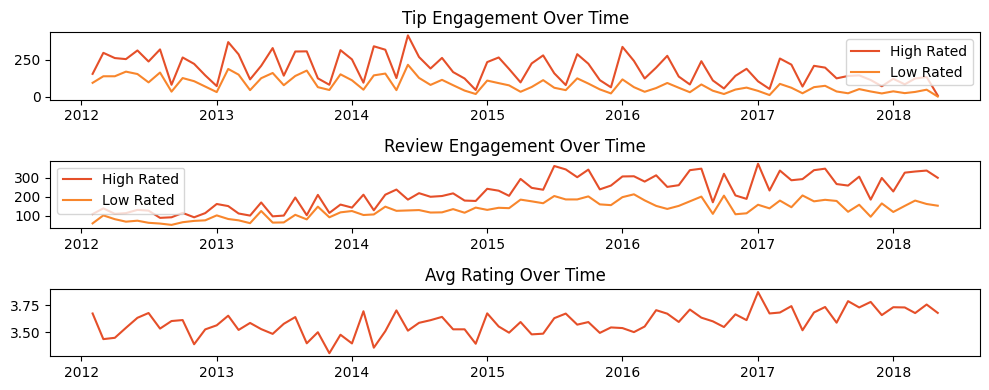

In [36]:
plt.figure(figsize = (10,4))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated['month_year'], high_rated['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated['month_year'], low_rated['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated['month_year'], high_rated['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated['month_year'], low_rated['review_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [ ]:
#  season time series data line chart

tip_high_rated = high_rated[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

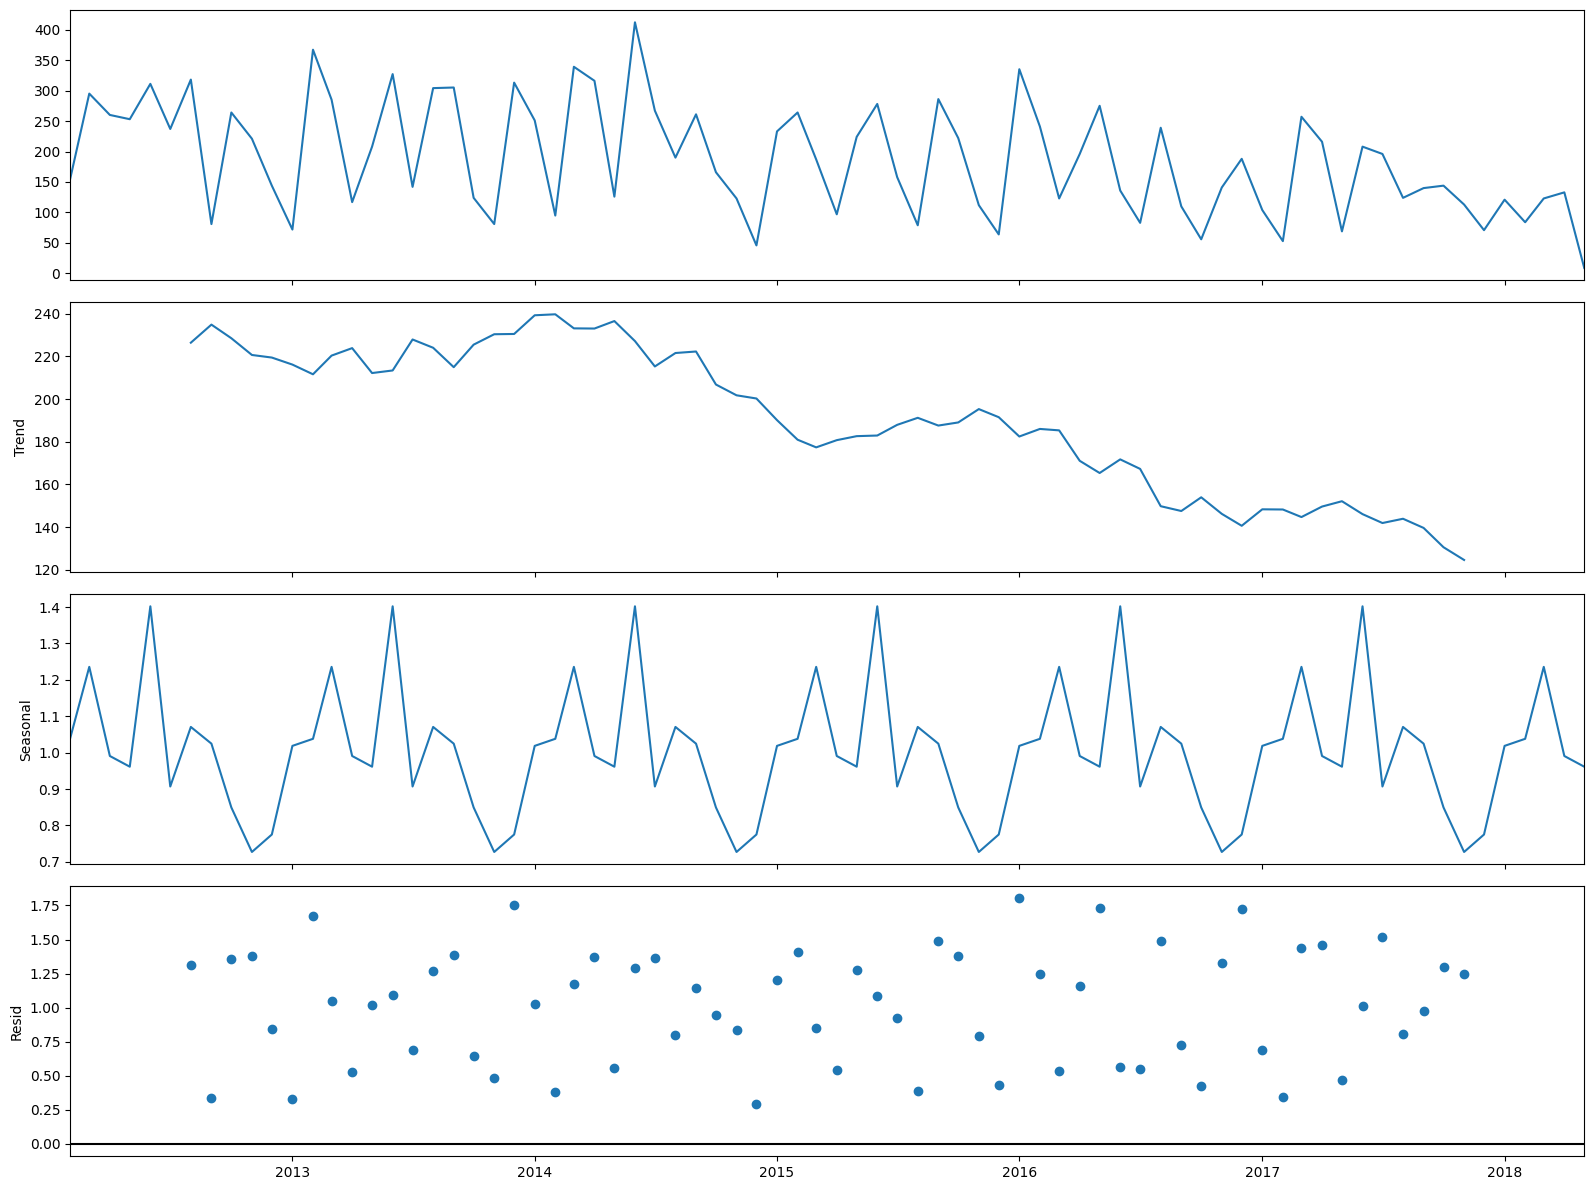

In [ ]:
# tip highrated
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                 model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

- review hirated

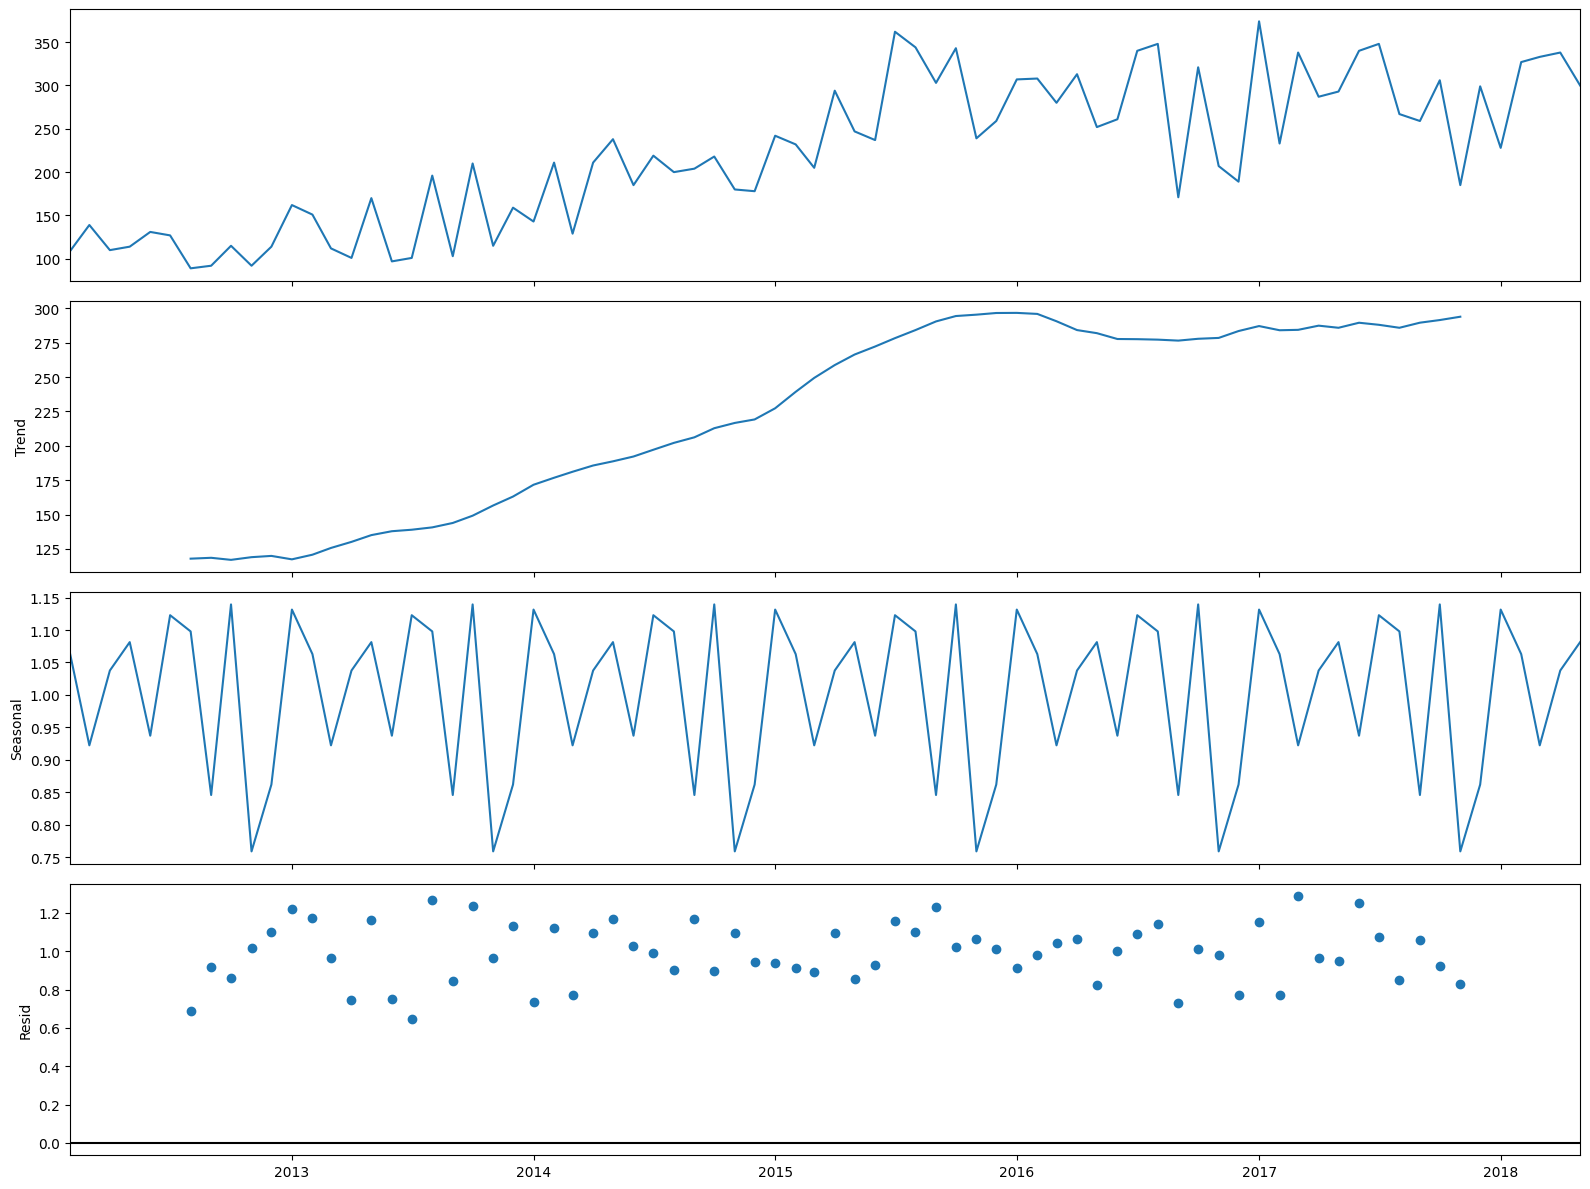

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                 model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

- time_rating

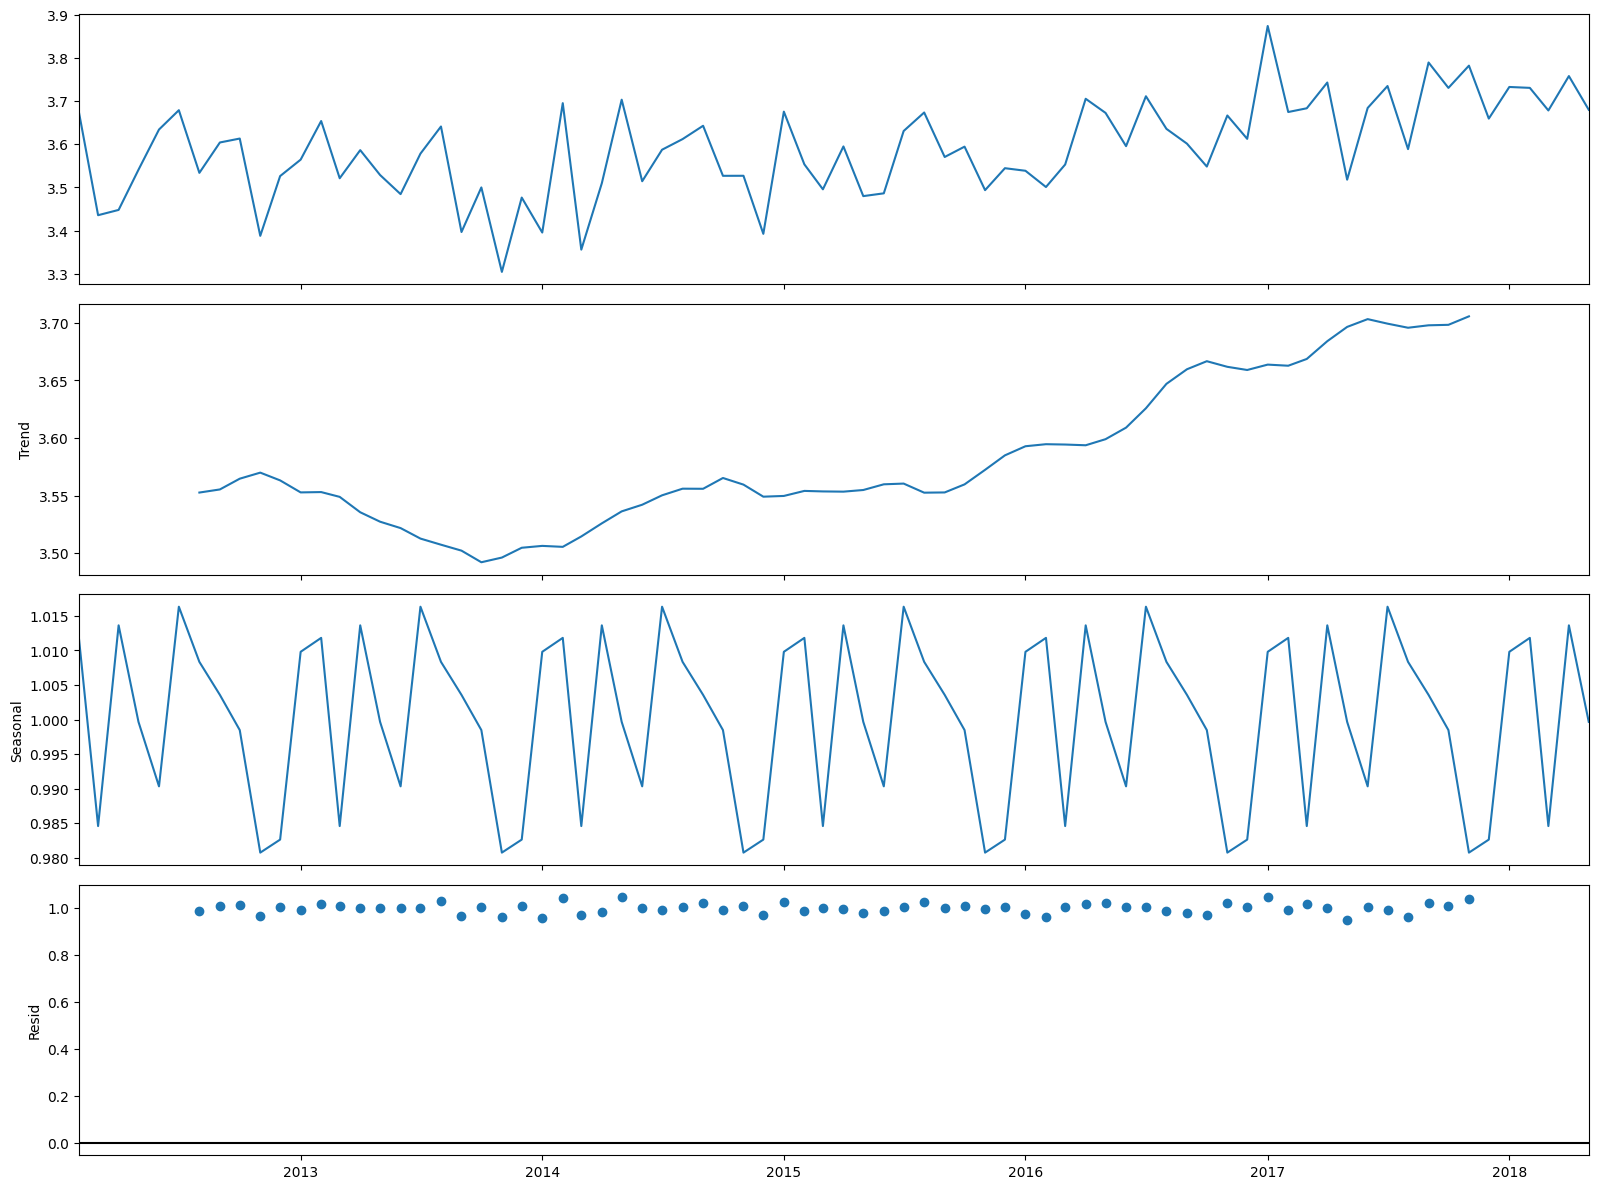

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(rating_df,
                                                 model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

- how does the sentimet of revies and tips (useful, funny, cool) correlated with the success metrics of resturants?


In [37]:
sentiment =pd.read_sql_query("""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
SUM(useful) as useful_count,
SUM(funny) as funny_count,
SUM(cool) as cool_count
FROM
review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id
WHERE b.business_id IN (select business_id from resto)
GROUP BY b.business_id
ORDER BY review_count""", conn)

In [38]:
sentiment= remove_outliers_iqr(sentiment,'review_count')
sentiment= remove_outliers_iqr(sentiment,'useful_count')
sentiment= remove_outliers_iqr(sentiment,'funny_count')
sentiment= remove_outliers_iqr(sentiment,'cool_count')

In [50]:
sentiment['success_score'] =  sentiment.apply(calculate_success_score, axis=1)

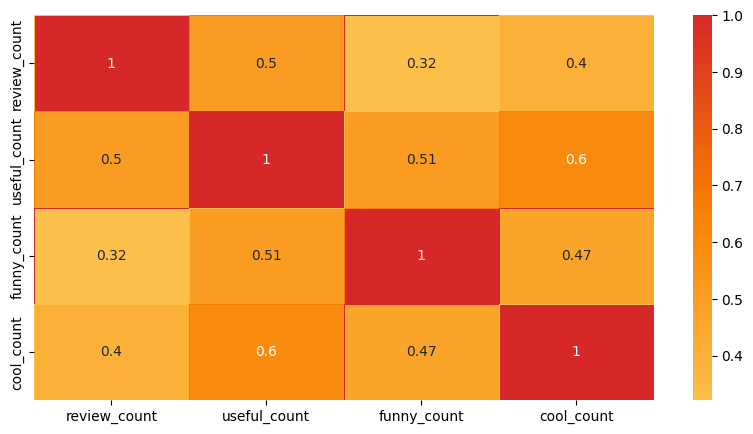

In [41]:
plt.figure(figsize=(10,5))
colors = ['#fcbf49','#f77f00','#d62828']

h_map = LinearSegmentedColormap.from_list('mycmap',colors)
sns.heatmap(sentiment[['review_count','useful_count','funny_count','cool_count']].corr(), cmap= h_map, annot = True, linewidths=0.5,linecolor=colors)

plt.show()



- Is there any difference in engagment of elite users and non elite users?

In [42]:
elite = pd.read_sql_query("""select elite,count(*) as num_users,
                          sum(review_count) as total_review_count
                          from (Select case when elite = '' then 'Not Elite'
                          else 'Elite' end as elite,
                          u.review_count from user u) as user_elite
                    group by elite""",conn)

In [43]:
elite

,elite,num_users,total_review_count
0,Elite,19862,6231756
1,Not Elite,80138,3031594


# Pie Chart

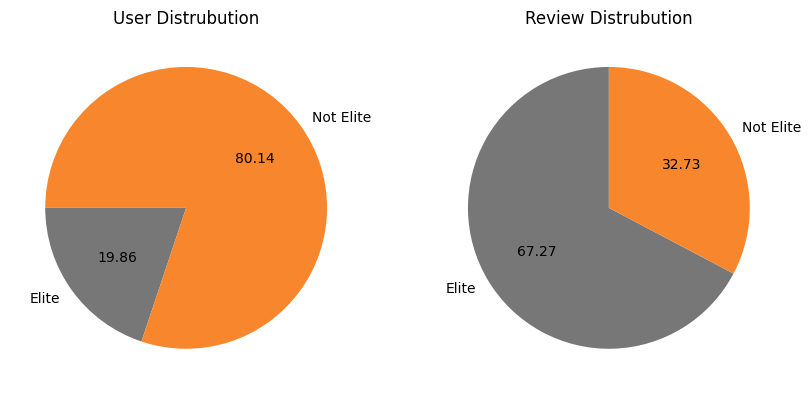

In [44]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('User Distrubution')
plt.pie(elite['num_users'], labels= elite['elite'],autopct= '%.2f',startangle=180,colors=['#777777','#f8862c'])


plt.subplot(1,2,2)
plt.title('Review Distrubution')
plt.pie(elite['total_review_count'], labels= elite['elite'],autopct= '%.2f',startangle=90,colors=['#777777','#f8862c'])
plt.show()

- What are the busiest hours for restaurants?

In [46]:
review_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H',date) as integer)
as hour,
COUNT(*) AS review_count
FROM
review
GROUP BY
hour;
""", conn)
tip_engagement = pd.read_sql_query("""SELECT
cast (strftime('%H',date) as integer)
as hour,
COUNT(*) AS tip_count
FROM
tip
GROUP BY
hour;
""", conn)
checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin ['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

<BarContainer object of 24 artists>

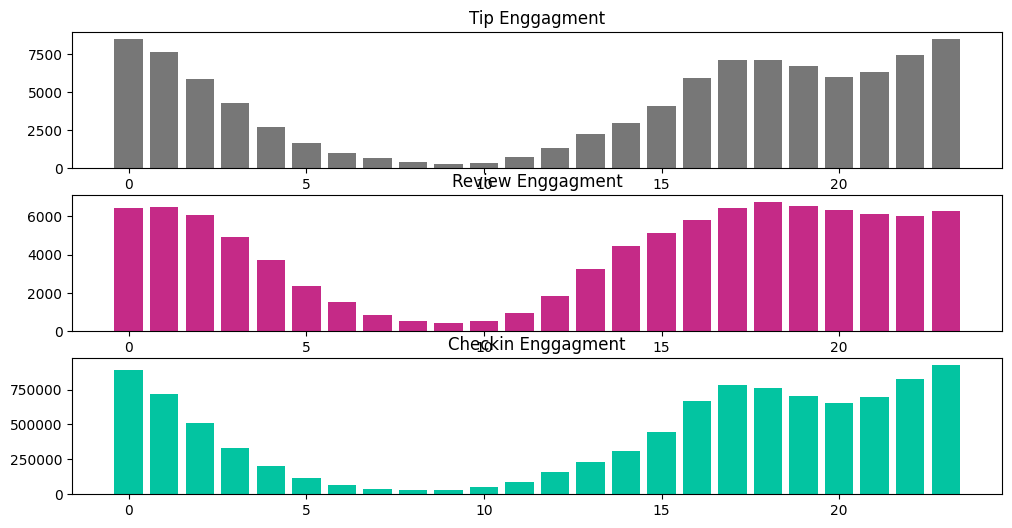

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.title('Tip Enggagment')
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'],color='#777777')

plt.subplot(3,1,2)
plt.title('Review Enggagment')
plt.bar(review_engagement['hour'],review_engagement['review_count'],color='#c52a87')

plt.subplot(3,1,3)
plt.title('Checkin Enggagment')
plt.bar(checkin_engagement.index,checkin_engagement[0],color='#03c4a1')

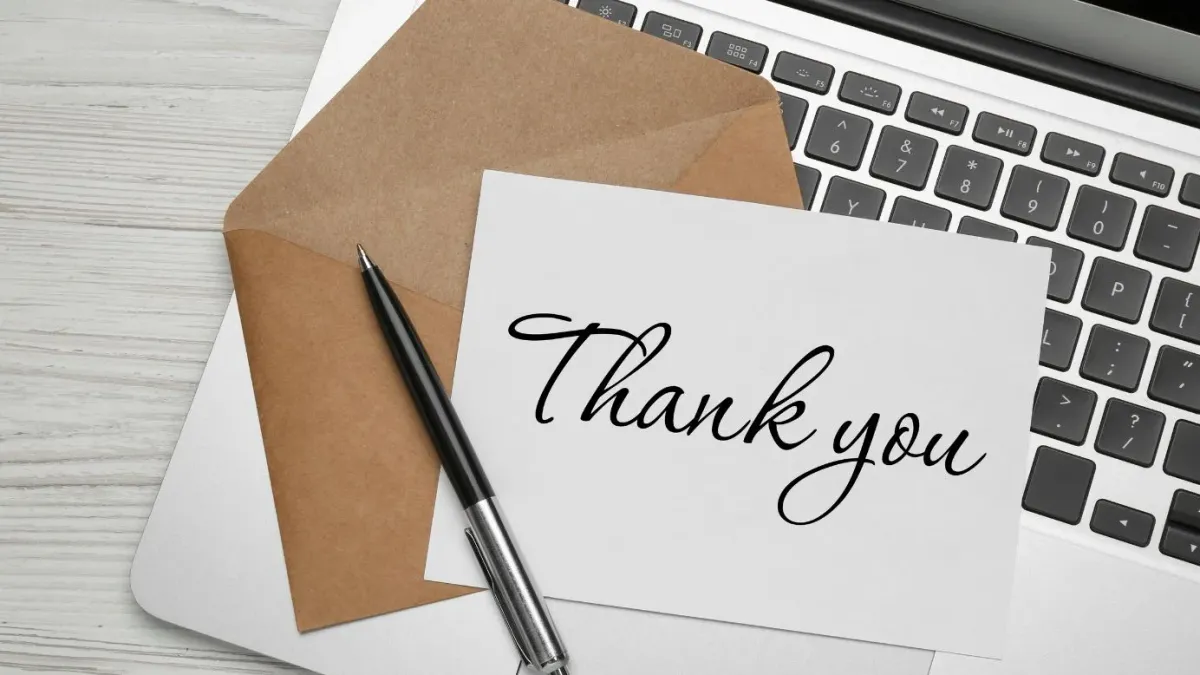